In [61]:
from pearce.mocks.kittens import TrainingBox

In [62]:
import numpy as np
from halotools.mock_observables import tpcf_one_two_halo_decomp

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [64]:
r_bins = np.logspace(-1.1, 1.6, 11)

In [65]:
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [136]:
boxno = 1
cat = TrainingBox(boxno, system = 'ki-ls')

In [137]:
cat.filenames

['/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_0.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_1.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_2.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_3.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_4.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_5.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_6.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_7.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_8.list',
 '/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b/outbgc2_9.list']

In [145]:
halodir

'/nfs/slac/g/ki/ki22/cosmo/beckermr/tinkers_emu/Box001/halos/m200b'

In [138]:
from os.path import join, dirname
from csv import DictReader, DictWriter

fieldnames = '#ID DescID M200b Vmax Vrms R200b Rs Np X Y Z VX VY VZ Parent_ID'.split(' ')

missed_keys = dict()
#cosmo_idx = 0
snapshot_idx = 9

halodir = dirname(cat.filenames[snapshot_idx])
outlist_fname = join(halodir, "out_%d.list"%snapshot_idx)

print cosmo_idx, snapshot_idx

outlist_rs = dict()
outlist_rvir = dict()
with open(outlist_fname) as csvfile:
    reader = DictReader(filter(lambda row: row[0]!='#' or row[:3]=='#ID', csvfile), delimiter = ' ')
    for row in reader:
        outlist_rs[row['#ID']] = row['Rs']
        outlist_rvir[row['#ID']] = row['R200b']

0 9


In [139]:
outlist_rs_arr = np.array(outlist_rs.values()).astype(float)
outlist_rvir_arr = np.array(outlist_rvir.values()).astype(float)

outlist_concs = outlist_rvir_arr/outlist_rs_arr

In [140]:
outlist_concs.shape

(9537295,)

In [141]:
cat.load(1.0)

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/cached_halo_catalog.py:567: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.log_entry.fname)


In [142]:
len(cat.halocat.halo_table)

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/halo_table_cache_log_entry.py:404: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(self.fname)
/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/halo_table_cache_log_entry.py:221: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x

9537295

In [143]:
arr_idxs = np.isfinite(outlist_concs)
cat_idxs = np.isfinite(cat.halocat.halo_table['halo_nfw_conc'])

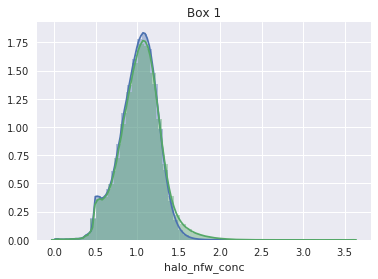

In [144]:
sns.distplot(np.log10(outlist_concs[arr_idxs]))
sns.distplot(np.log10(cat.halocat.halo_table['halo_nfw_conc'][cat_idxs]))
plt.title('Box %d'%boxno)

In [128]:
cat_rs = cat.halocat.halo_table['halo_rs']

In [129]:
so_rs, sc_rs = sorted(outlist_rs_arr), sorted(cat_rs)

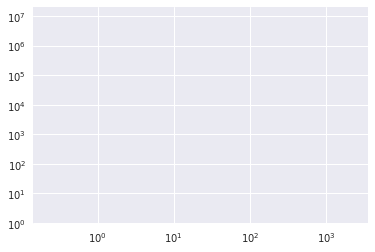

In [130]:
plt.hist(so_rs, alpha = 0.3)
plt.hist(sc_rs, alpha = 0.3)
plt.loglog();

In [131]:
so_rs = np.array(so_rs)/1000

In [132]:
sc_rs = np.array(sc_rs)

In [135]:
so_rs[-100:], sc_rs[-100:]

(array([1.166551, 1.16876 , 1.170837, 1.172706, 1.173435, 1.175669,
        1.178514, 1.179364, 1.179552, 1.185505, 1.185936, 1.189598,
        1.191034, 1.194877, 1.195465, 1.195893, 1.201139, 1.201318,
        1.208251, 1.221391, 1.228048, 1.23174 , 1.233371, 1.233784,
        1.234081, 1.234843, 1.239313, 1.248351, 1.250539, 1.251836,
        1.254106, 1.272076, 1.274141, 1.276328, 1.278318, 1.282019,
        1.291203, 1.296845, 1.309911, 1.312583, 1.312787, 1.316627,
        1.31821 , 1.32156 , 1.326773, 1.328898, 1.335692, 1.335851,
        1.337527, 1.339705, 1.340078, 1.345723, 1.345782, 1.346101,
        1.346937, 1.352792, 1.361605, 1.363058, 1.366344, 1.368634,
        1.372277, 1.372996, 1.375814, 1.384911, 1.394169, 1.398047,
        1.406694, 1.413024, 1.416634, 1.418892, 1.420147, 1.435947,
        1.436082, 1.447801, 1.479046, 1.492542, 1.499214, 1.504311,
        1.506773, 1.519541, 1.521205, 1.534266, 1.584563, 1.58914 ,
        1.630004, 1.636454, 1.642735, 1.653295, 